## House Prices Prediction 

Ask a home buyer to describe their dream house, and they probably won't begin with the height of the basement ceiling or the proximity to an east-west railroad. But this playground competition's dataset proves that much more influences price negotiations than the number of bedrooms or a white-picket fence.

With 79 explanatory variables describing (almost) every aspect of residential homes in Ames, Iowa, this competition challenges you to predict the final price of each home.

##### Practice Skills
- Creative feature engineering 
- Advanced regression techniques like random forest and gradient boosting

###  1.  Importing libraries 

In [2250]:
import warnings
warnings.filterwarnings('ignore')

In [2251]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

### 2. Importing Files

In [2252]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 100)

In [2253]:
df_train = pd.read_csv('train.csv')
df_train. head(-10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1445,1446,85,RL,70.0,8400,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Sawyer,Norm,Norm,1Fam,SFoyer,6,5,1966,1966,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,Gd,LwQ,187,Rec,627,0,814,GasA,Gd,Y,SBrkr,913,0,0,913,1,0,1,0,3,1,TA,6,Typ,0,NaN,Detchd,1990.0,Unf,1,240,TA,TA,Y,0,0,252,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,129000
1446,1447,20,RL,NaN,26142,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,Mitchel,Norm,Norm,1Fam,1Story,5,7,1962,1962,Gable,CompShg,HdBoard,HdBoard,BrkFace,189.0,TA,TA,CBlock,TA,TA,No,Rec,593,Unf,0,595,1188,GasA,TA,Y,SBrkr,1188,0,0,1188,0,0,1,0,3,1,TA,6,Typ,0,NaN,Attchd,1962.0,Unf,1,312,TA,TA,P,261,39,0,0,0,0,NaN,NaN,NaN,0,4,2010,WD,Normal,157900
1447,1448,60,RL,80.0,10000,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,8,5,1995,1996,Gable,CompShg,VinylSd,VinylSd,BrkFace,438.0,Gd,TA,PConc,Gd,TA,No,GLQ,1079,Unf,0,141,1220,GasA,Ex,Y,SBrkr,1220,870,0,2090,1,0,2,1,3,1,Gd,8,Typ,1,TA,Attchd,1995.0,RFn,2,556,TA,TA,Y,0,65,0,0,0,0,NaN,NaN,NaN,0,12,2007,WD,Normal,240000
1448,1449,50,RL,70.0,11767,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,1Fam,2Story,4,7,1910,2000,Gable,CompShg,MetalSd,HdBoard,None,0.0,TA,TA,CBlock,Fa,TA,No,Unf,0,Unf,0,560,560

In [2254]:
df_test = pd.read_csv('test.csv')
df_test.head(-10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1444,2905,20,NaN,125.0,31250,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Artery,Norm,1Fam,1Story,1,3,1951,1951,Gable,CompShg,CBlock,VinylSd,None,0.0,TA,Fa,CBlock,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,GasA,TA,Y,FuseA,1600,0,0,1600,0.0,0.0,1,1,3,1,TA,6,Mod,0,NaN,Attchd,1951.0,Unf,1.0,270.0,Fa,TA,N,0,0,135,0,0,0,NaN,NaN,NaN,0,5,2006,WD,Normal
1445,2906,90,RM,78.0,7020,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,Duplex,SFoyer,7,5,1997,1997,Gable,CompShg,MetalSd,MetalSd,BrkFace,200.0,TA,Gd,PConc,Gd,TA,Gd,GLQ,1243.0,Unf,0.0,45.0,1288.0,GasA,Gd,Y,SBrkr,1368,0,0,1368,2.0,0.0,2,0,2,2,TA,8,Typ,0,NaN,Attchd,1997.0,Fin,4.0,784.0,TA,TA,Y,0,48,0,0,0,0,NaN,NaN,NaN,0,11,2006,WD,Normal
1446,2907,160,RM,41.0,2665,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,TwnhsE,2Story,5,6,1977,1977,Gable,CompShg,CemntBd,CmentBd,None,0.0,TA,TA,PConc,Gd,TA,Mn,Unf,0.0,Unf,0.0,264.0,264.0,GasA,TA,Y,SBrkr,616,688,0,1304,0.0,0.0,1,1,3,1,TA,5,Typ,1,TA,BuiltIn,1977.0,RFn,1.0,336.0,TA,TA,Y,141,0,0,0,0,0,NaN,NaN,NaN,0,5,2006,WD,Normal
1447,2908,20,RL,58.0,10172,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1Story,5,7,1968,2003,G

### 3. Data Types

In [2255]:
# Determining the shape of the datset

df_train.shape

(1460, 81)

In [2256]:
# Checking the column-wise info of the dataframe

df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [2257]:
# Checking the summary for the numeric columns 

df_train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [2258]:
# Determining the shape of the datset

df_test.shape

(1459, 80)

In [2259]:
# Checking the column-wise info of the dataframe

df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

In [2260]:
# Checking the summary for the numeric columns 

df_test.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
count,1459.000000,1459.000000,1232.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1444.000000,1458.000000,1458.000000,1458.000000,1458.000000,1459.000000,1459.000000,1459.000000,1459.000000,1457.000000,1457.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.00000,1381.000000,1458.000000,1458.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000
mean,2190.000000,57.378341,68.580357,9819.161069,6.078821,5.553804,1971.357779,1983.662783,100.709141,439.203704,52.619342,554.294925,1046.117970,1156.534613,325.967786,3.543523,1486.045922,0.434454,0.065202,1.570939,0.377656,2.854010,1.042495,6.385195,0.58122,1977.721217,1.766118,472.768861,93.174777,48.313914,24.243317,1.794380,17.064428,1.744345,58.167923,6.104181,2007.769705
std,421.321334,42.746880,22.376841,4955.517327,1.436812,1.113740,30.390071,21.130467,177.625900,455.268042,176.753926,437.260486,442.898624,398.165820,420.610226,44.043251,485.566099,0.530648,0.252468,0.555190,0.503017,0.829788,0.208472,1.508895,0.64742,26.431175,0.775945,217.048611,127.744882,68.883364,67.227765,20.207842,56.609763,30.491646,630.806978,2.722432,1.301740
min,1461.000000,20.000000,21.000000,1470.000000,1.000000,1.000000,1879.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,407.000000,0.000000,0.000000,407.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,0.00000,1895.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000
25%,1825.500000,20.000000,58.000000,7391.000000,5.000000,5.000000,1953.000000,1963.000000,0.000000,0.000000,0.000000,219.250000,784.000000,873.500000,0.000000,0.000000,1117.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.00000,1959.000000,1.000000,318.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000
50%,2190.000000,50.000000,67.000000,9399.000000,6.000000,5.000000,1973.000000,1992.000000,0.000000,350.500000,0.000000,460.000000,988.000000,1079.000000,0.000000,0.000000,1432.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,0.00000,1979.000000,2.000000,480.000000,0.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000
75%,2554.500000,70.000000,80.000000,11517.500000,7.000000,6.000000,2001.000000,2004.000000,164.000000,753.500000,0.000000,797.750000,1305.000000,1382.500000,676.000000,0.000000,1721.000000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.00000,2002.000000,2.000000,576.000000,168.000000,72.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000
max,2919.000000,190.000000,200.000000,56600.000000,10.000000,9.000000,2010.000000,2010.000000,1290.000000,4010.000000,1526.000000,2140.000000,5095.000000,5095.000000,1862.000000,1064.000000,5095.000000,3.000000,2.000000,4.000000,2.000000,6.000000,2.000000,15.000000,4.00000,2207.000000,5.000000,1488.000000,1424.000000,742.000000,1012.000000,360.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000


### 4. Missing value treatment : `df_train`

In [2261]:
# Checking number of missing value from columns

df_missing = df_train.isnull().sum().sort_values(ascending= False)
df_missing.head(20)

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
FireplaceQu      690
LotFrontage      259
GarageCond        81
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
BsmtExposure      38
BsmtFinType2      38
BsmtFinType1      37
BsmtCond          37
BsmtQual          37
MasVnrArea         8
MasVnrType         8
Electrical         1
Utilities          0
dtype: int64

In [2262]:
# Checking Percentage of missing values

df_missing = 100*(df_missing/len(df_train))
df_missing.head(20)

PoolQC          99.520548
MiscFeature     96.301370
Alley           93.767123
Fence           80.753425
FireplaceQu     47.260274
LotFrontage     17.739726
GarageCond       5.547945
GarageType       5.547945
GarageYrBlt      5.547945
GarageFinish     5.547945
GarageQual       5.547945
BsmtExposure     2.602740
BsmtFinType2     2.602740
BsmtFinType1     2.534247
BsmtCond         2.534247
BsmtQual         2.534247
MasVnrArea       0.547945
MasVnrType       0.547945
Electrical       0.068493
Utilities        0.000000
dtype: float64

##### Removing columns with missing value more than 30%

In [2263]:
df_train = df_train.loc[:, df_missing <= 30]

In [2264]:
df_missing = df_train.isnull().sum().sort_values(ascending= False)
df_missing.head(20)

LotFrontage     259
GarageFinish     81
GarageType       81
GarageCond       81
GarageQual       81
GarageYrBlt      81
BsmtExposure     38
BsmtFinType2     38
BsmtFinType1     37
BsmtCond         37
BsmtQual         37
MasVnrType        8
MasVnrArea        8
Electrical        1
RoofStyle         0
RoofMatl          0
SalePrice         0
Exterior1st       0
Exterior2nd       0
YearBuilt         0
dtype: int64

In [2265]:
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,0,12,2008,WD,Normal,250000


### 4.1 Treating missing values of column: `LotFrontage`     

In [2266]:
df_train['LotFrontage'].isnull().sum()

259

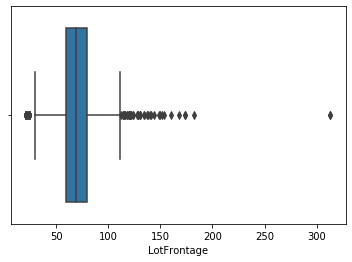

In [2267]:
sns.boxplot(df_train['LotFrontage'])
plt.show()

In [2268]:
df_train['LotFrontage'].describe()

count    1201.000000
mean       70.049958
std        24.284752
min        21.000000
25%        59.000000
50%        69.000000
75%        80.000000
max       313.000000
Name: LotFrontage, dtype: float64

In [2269]:
# imputing missing values by median as column contains outliers

med_LotFrontage = df_train['LotFrontage'].median()
med_LotFrontage

69.0

In [2270]:
df_train['LotFrontage'] = df_train['LotFrontage'].replace(np.nan, med_LotFrontage)

In [2271]:
df_train['LotFrontage'].isnull().sum()

0

### 4.2 Treating missing values of column: `GarageFinish `

In [2272]:
df_train['GarageFinish'].isnull().sum()

81

In [2273]:
df_train['GarageFinish'].value_counts(dropna= False)

Unf    605
RFn    422
Fin    352
NaN     81
Name: GarageFinish, dtype: int64

In [2274]:
# Calculating mode for imputing the missing values in column 'GarageFinish'

mode_GarageFinish = df_train['GarageFinish'].mode()[0]
mode_GarageFinish

'Unf'

In [2275]:
# Imputing missing values with mode

df_train['GarageFinish'] = df_train['GarageFinish'].replace(np.nan, mode_GarageFinish)

In [2276]:
df_train['GarageFinish'].isnull().sum()

0

### 4.3 Treating missing values of column: `GarageType `

In [2277]:
df_train['GarageType'].isnull().sum()

81

In [2278]:
df_train['GarageType'].value_counts(dropna= False)

Attchd     870
Detchd     387
BuiltIn     88
NaN         81
Basment     19
CarPort      9
2Types       6
Name: GarageType, dtype: int64

In [2279]:
# Calculating mode for imputing the missing values in column 'GarageType'

mode_GarageType = df_train['GarageType'].mode()[0]
mode_GarageType

'Attchd'

In [2280]:
# Imputing missing values with mode

df_train['GarageType'] = df_train['GarageType'].replace(np.nan, mode_GarageType)

In [2281]:
df_train['GarageType'].isnull().sum()

0

### 4.4 Treating missing values of column: `GarageCond`

In [2282]:
df_train['GarageCond'].isnull().sum()

81

In [2283]:
df_train['GarageCond'].value_counts(dropna= False)

TA     1326
NaN      81
Fa       35
Gd        9
Po        7
Ex        2
Name: GarageCond, dtype: int64

In [2284]:
# Calculating mode for imputing the missing values in column 'GarageCond'

mode_GarageCond = df_train['GarageCond'].mode()[0]
mode_GarageCond

'TA'

In [2285]:
# Imputing missing values with mode

df_train['GarageCond'] = df_train['GarageCond'].replace(np.nan, mode_GarageCond)

In [2286]:
df_train['GarageCond'].isnull().sum()

0

### 4.5 Treating missing values of column: `GarageQual`

In [2287]:
df_train['GarageQual'].isnull().sum()

81

In [2288]:
df_train['GarageQual'].value_counts(dropna= False)

TA     1311
NaN      81
Fa       48
Gd       14
Po        3
Ex        3
Name: GarageQual, dtype: int64

In [2289]:
# Calculating mode for imputing the missing values in column 'GarageQual'

mode_GarageQual = df_train['GarageQual'].mode()[0]
mode_GarageQual

'TA'

In [2290]:
# Imputing missing values with mode

df_train['GarageQual'] = df_train['GarageQual'].replace(np.nan, mode_GarageQual)

In [2291]:
df_train['GarageQual'].isnull().sum()

0

### 4.6 Treating missing values of column: `GarageYrBlt`

In [2292]:
df_train['GarageYrBlt'].isnull().sum()

81

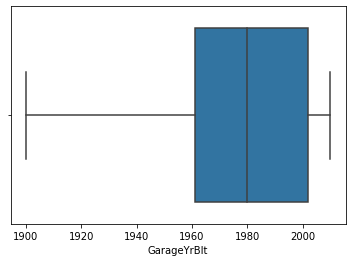

In [2293]:
sns.boxplot(df_train['GarageYrBlt'])
plt.show()

In [2294]:
df_train['GarageYrBlt'].describe()

count    1379.000000
mean     1978.506164
std        24.689725
min      1900.000000
25%      1961.000000
50%      1980.000000
75%      2002.000000
max      2010.000000
Name: GarageYrBlt, dtype: float64

In [2295]:
# dropping missing values from column : 'GarageYrBlt'

df_train = df_train[~df_train['GarageYrBlt'].isnull()].copy()

In [2296]:
df_train['GarageYrBlt'].isnull().sum()

0

### 4.7 Treating missing values of column: `BsmtExposure`

In [2297]:
df_train['BsmtExposure'].isnull().sum()

31

In [2298]:
df_train['BsmtExposure'].value_counts(dropna= False)

No     896
Av     213
Gd     128
Mn     111
NaN     31
Name: BsmtExposure, dtype: int64

In [2299]:
# Calculating mode for imputing the missing values in column 'BsmtExposure'

mode_BsmtExposure = df_train['BsmtExposure'].mode()[0]
mode_BsmtExposure

'No'

In [2300]:
# Imputing missing values with mode

df_train['BsmtExposure'] = df_train['BsmtExposure'].replace(np.nan, mode_BsmtExposure)

In [2301]:
df_train['BsmtExposure'].isnull().sum()

0

### 4.8 Treating missing values of column: `BsmtFinType2`

In [2302]:
df_train['BsmtFinType2'].isnull().sum()

31

In [2303]:
df_train['BsmtFinType2'].value_counts(dropna= False)

Unf    1186
Rec      53
LwQ      46
BLQ      32
NaN      31
ALQ      19
GLQ      12
Name: BsmtFinType2, dtype: int64

In [2304]:
# Calculating mode for imputing the missing values in column 'BsmtFinType2'

mode_BsmtFinType2 = df_train['BsmtFinType2'].mode()[0]
mode_BsmtFinType2

'Unf'

In [2305]:
# Imputing missing values with mode

df_train['BsmtFinType2'] = df_train['BsmtFinType2'].replace(np.nan, mode_BsmtFinType2)

In [2306]:
df_train['BsmtFinType2'].isnull().sum()

0

### 4.9 Treating missing values of column: `BsmtCond`

In [2307]:
df_train['BsmtCond'].isnull().sum()

30

In [2308]:
df_train['BsmtCond'].value_counts(dropna= False)

TA     1247
Gd       63
Fa       38
NaN      30
Po        1
Name: BsmtCond, dtype: int64

In [2309]:
# Calculating mode for imputing the missing values in column 'BsmtCond'

mode_BsmtCond = df_train['BsmtCond'].mode()[0]
mode_BsmtCond

'TA'

In [2310]:
# Imputing missing values with mode

df_train['BsmtCond'] = df_train['BsmtCond'].replace(np.nan, mode_BsmtCond)

In [2311]:
df_train['BsmtCond'].isnull().sum()

0

### 4.10 Treating missing values of column: `BsmtQual`

In [2312]:
df_train['BsmtQual'].isnull().sum()

30

In [2313]:
df_train['BsmtQual'].value_counts(dropna= False)

Gd     601
TA     595
Ex     121
Fa      32
NaN     30
Name: BsmtQual, dtype: int64

In [2314]:
# Calculating mode for imputing the missing values in column 'BsmtQual'

mode_BsmtQual = df_train['BsmtQual'].mode()[0]
mode_BsmtQual

'Gd'

In [2315]:
# Imputing missing values with mode

df_train['BsmtQual'] = df_train['BsmtQual'].replace(np.nan, mode_BsmtQual)

In [2316]:
df_train['BsmtQual'].isnull().sum()

0

In [2317]:
# Dropping missing rows from dataset

df_train = df_train.dropna()

In [2318]:
df_train.shape

(1340, 76)

### 5. Missing value treatment : `df_test`

In [2319]:
# Checking number of missing value from columns

df_missing = df_test.isnull().sum().sort_values(ascending= False)
df_missing.head(35)

PoolQC          1456
MiscFeature     1408
Alley           1352
Fence           1169
FireplaceQu      730
LotFrontage      227
GarageCond        78
GarageQual        78
GarageYrBlt       78
GarageFinish      78
GarageType        76
BsmtCond          45
BsmtQual          44
BsmtExposure      44
BsmtFinType1      42
BsmtFinType2      42
MasVnrType        16
MasVnrArea        15
MSZoning           4
BsmtHalfBath       2
Utilities          2
Functional         2
BsmtFullBath       2
BsmtFinSF2         1
BsmtFinSF1         1
Exterior2nd        1
BsmtUnfSF          1
TotalBsmtSF        1
SaleType           1
Exterior1st        1
KitchenQual        1
GarageArea         1
GarageCars         1
HouseStyle         0
LandSlope          0
dtype: int64

In [2320]:
# Checking Percentage of missing values

df_missing = 100*(df_missing/len(df_test))
df_missing.head(35)

PoolQC          99.794380
MiscFeature     96.504455
Alley           92.666210
Fence           80.123372
FireplaceQu     50.034270
LotFrontage     15.558602
GarageCond       5.346127
GarageQual       5.346127
GarageYrBlt      5.346127
GarageFinish     5.346127
GarageType       5.209047
BsmtCond         3.084304
BsmtQual         3.015764
BsmtExposure     3.015764
BsmtFinType1     2.878684
BsmtFinType2     2.878684
MasVnrType       1.096642
MasVnrArea       1.028101
MSZoning         0.274160
BsmtHalfBath     0.137080
Utilities        0.137080
Functional       0.137080
BsmtFullBath     0.137080
BsmtFinSF2       0.068540
BsmtFinSF1       0.068540
Exterior2nd      0.068540
BsmtUnfSF        0.068540
TotalBsmtSF      0.068540
SaleType         0.068540
Exterior1st      0.068540
KitchenQual      0.068540
GarageArea       0.068540
GarageCars       0.068540
HouseStyle       0.000000
LandSlope        0.000000
dtype: float64

##### Removing columns with missing value more than 30%

In [2321]:
df_test = df_test.loc[:, df_missing <= 30]

In [2322]:
df_missing = df_test.isnull().sum().sort_values(ascending= False)
df_missing.head(30)

LotFrontage     227
GarageCond       78
GarageQual       78
GarageYrBlt      78
GarageFinish     78
GarageType       76
BsmtCond         45
BsmtQual         44
BsmtExposure     44
BsmtFinType1     42
BsmtFinType2     42
MasVnrType       16
MasVnrArea       15
MSZoning          4
BsmtHalfBath      2
Utilities         2
Functional        2
BsmtFullBath      2
BsmtUnfSF         1
SaleType          1
BsmtFinSF2        1
BsmtFinSF1        1
Exterior2nd       1
Exterior1st       1
TotalBsmtSF       1
GarageCars        1
KitchenQual       1
GarageArea        1
HouseStyle        0
MSSubClass        0
dtype: int64

In [2323]:
df_test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,0,1,2010,WD,Normal


### 5.1 Treating missing values of column: `LotFrontage`

In [2324]:
df_test['LotFrontage'].isnull().sum()

227

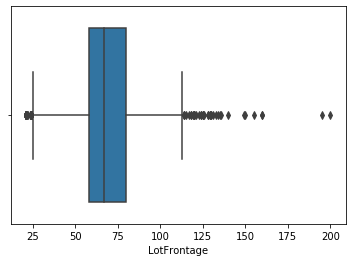

In [2325]:
sns.boxplot(df_test['LotFrontage'])
plt.show()

In [2326]:
df_test['LotFrontage'].describe()

count    1232.000000
mean       68.580357
std        22.376841
min        21.000000
25%        58.000000
50%        67.000000
75%        80.000000
max       200.000000
Name: LotFrontage, dtype: float64

In [2327]:
# Calculating median for missing value treatment

med_LotFrontage = df_test['LotFrontage'].median()
med_LotFrontage

67.0

In [2328]:
# Imputing missing value with median 

df_test['LotFrontage'] = df_test['LotFrontage'].replace(np.nan, med_LotFrontage)

In [2329]:
df_test['LotFrontage'].isnull().sum()

0

### 5.2 Treating missing values of column: `GarageCond`

In [2330]:
df_test['GarageCond'].isnull().sum()

78

In [2331]:
df_test['GarageCond'].value_counts(dropna=False)

TA     1328
NaN      78
Fa       39
Po        7
Gd        6
Ex        1
Name: GarageCond, dtype: int64

In [2332]:
# Calculating mode for missing value imputation

mode_GarageCond = df_test['GarageCond'].mode()[0]
mode_GarageCond

'TA'

In [2333]:
# Imputing mode value to missing value

df_test['GarageCond'] = df_test['GarageCond'].replace(np.nan, mode_GarageCond)

In [2334]:
df_test['GarageCond'].isnull().sum()

0

### 5.3 Treating missing values of column: `GarageQual`

In [2335]:
df_test['GarageQual'].isnull().sum()

78

In [2336]:
df_test['GarageQual'].value_counts(dropna= False)

TA     1293
NaN      78
Fa       76
Gd       10
Po        2
Name: GarageQual, dtype: int64

In [2337]:
# Calculating mode for missing value imputation 'GarageQual'

mode_GarageQual = df_test['GarageQual'].mode()[0]
mode_GarageQual

'TA'

In [2338]:
# Imputing mode value to missing value

df_test['GarageQual'] = df_test['GarageQual'].replace(np.nan, mode_GarageQual)

In [2339]:
df_test['GarageQual'].isnull().sum()

0

### 5.4 Treating missing values of column: `GarageYrBlt`

In [2340]:
df_test['GarageYrBlt'].isnull().sum()

78

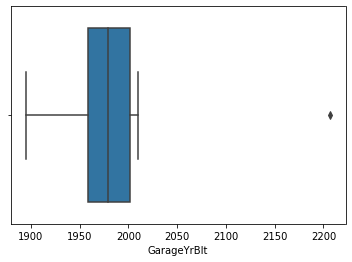

In [2341]:
sns.boxplot(df_test['GarageYrBlt'])
plt.show()

In [2342]:
df_test['GarageYrBlt'].describe()

count    1381.000000
mean     1977.721217
std        26.431175
min      1895.000000
25%      1959.000000
50%      1979.000000
75%      2002.000000
max      2207.000000
Name: GarageYrBlt, dtype: float64

In [2343]:
# dropping missing values from column : 'GarageYrBlt'

df_test = df_test[~df_test['GarageYrBlt'].isnull()].copy()

In [2344]:
df_test['GarageYrBlt'].isnull().sum()

0

### 5.5 Treating missing values of column: `GarageFinish`

In [2345]:
df_test['GarageFinish'].isnull().sum()

0

##### Here missing values for 'GarageYrBlt' and 'GarageFinish' are same, so dropped missing value in both

### 5.6 Treating missing values of column: `GarageType`

In [2346]:
df_test['GarageType'].isnull().sum()

0

##### Here missing values for 'GarageYrBlt' , 'GarageFinish'  and 'GarageType' are same, so dropped missing value in all

### 5.7 Treating missing values of column: `BsmtCond`

In [2347]:
df_test['BsmtCond'].isnull().sum()

38

In [2348]:
df_test['BsmtCond'].value_counts(dropna= False)

TA     1239
Gd       54
Fa       49
NaN      38
Po        1
Name: BsmtCond, dtype: int64

In [2349]:
# Calculating mode for missing value imputation 'BsmtCond'

mode_BsmtCond = df_test['BsmtCond'].mode()[0]
mode_BsmtCond

'TA'

In [2350]:
# Imputing mode value to missing value 

df_test['BsmtCond'] = df_test['BsmtCond'].replace(np.nan, mode_BsmtCond)

In [2351]:
df_test['BsmtCond'].isnull().sum()

0

### 5.8 Treating missing values of column:  `BsmtQual`

In [2352]:
df_test['BsmtQual'].isnull().sum()

37

In [2353]:
df_test['BsmtQual'].value_counts(dropna= False)

TA     592
Gd     573
Ex     137
Fa      42
NaN     37
Name: BsmtQual, dtype: int64

In [2354]:
# Calculating mode for missing value imputation 'BsmtQual'

mode_BsmtQual = df_test['BsmtQual'].mode()[0]
mode_BsmtQual

'TA'

In [2355]:
# Imputing mode value to missing value

df_test['BsmtQual'] = df_test['BsmtQual'].replace(np.nan, mode_BsmtQual)

In [2356]:
df_test['BsmtQual'].isnull().sum()

0

### 5.9 Treating missing values of column: `BsmtExposure`

In [2357]:
df_test['BsmtExposure'].isnull().sum()

37

In [2358]:
# Calculating mode for missing value imputation 'BsmtExposure'

mode_BsmtExposure = df_test['BsmtExposure'].mode()[0]
mode_BsmtExposure

'No'

In [2359]:
# Imputing mode value to missing value

df_test['BsmtExposure'] = df_test['BsmtExposure'].replace(np.nan, mode_BsmtExposure)

In [2360]:
df_test['BsmtExposure'].isnull().sum()

0

### 5.10 Treating missing values of column: `BsmtFinType1`

In [2361]:
df_test['BsmtFinType1'].isnull().sum()

35

In [2362]:
df_test['BsmtFinType1'].value_counts(dropna= False)

GLQ    420
Unf    378
ALQ    202
Rec    150
BLQ    118
LwQ     78
NaN     35
Name: BsmtFinType1, dtype: int64

In [2363]:
# Calculating mode for missing value imputation 'BsmtFinType1'

mode_BsmtFinType1 = df_test['BsmtFinType1'].mode()[0]
mode_BsmtFinType1

'GLQ'

In [2364]:
# Imputing mode value to missing value 

df_test['BsmtFinType1'] = df_test['BsmtFinType1'].replace(np.nan, mode_BsmtFinType1)

In [2365]:
df_test['BsmtFinType1'].isnull().sum()

0

### 5.11 Treating missing values of column: `BsmtFinType2`

In [2366]:
df_test['BsmtFinType2'].isnull().sum()

35

In [2367]:
df_test['BsmtFinType2'].value_counts(dropna= False)

Unf    1168
Rec      50
LwQ      41
BLQ      35
NaN      35
ALQ      32
GLQ      20
Name: BsmtFinType2, dtype: int64

In [2368]:
# Calculating mode for missing value imputation 'BsmtFinType2'
mode_BsmtFinType2 = df_test['BsmtFinType2'].mode()[0]
mode_BsmtFinType2

'Unf'

In [2369]:
# Imputing mode value to missing value 

df_test['BsmtFinType2'] = df_test['BsmtFinType2'].replace(np.nan, mode_BsmtFinType2)

In [2370]:
df_test['BsmtFinType2'].isnull().sum()

0

In [2371]:
# Dropping missing rows from dataset

df_test = df_test.dropna()

In [2372]:
df_test.shape

(1356, 75)

### 6. Outlier treatment on `df_train`

In [2373]:
df_train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000
mean,731.094030,56.111940,70.445522,10708.718657,6.221642,5.595522,1973.073134,1985.694776,110.523881,464.380597,49.502239,583.520149,1097.402985,1176.380597,357.235075,4.215672,1537.831343,0.438806,0.060448,1.576119,0.402985,2.864925,1.029851,6.550746,0.649254,1978.632090,1.872388,501.711940,99.344030,47.782836,21.232090,3.580597,16.409701,3.005970,42.868657,6.331343,2007.805224,186838.630597
std,421.647039,41.233712,22.157812,10329.292015,1.324546,1.077564,29.563375,20.292377,185.537727,458.979413,166.492415,440.610264,409.354159,386.609919,440.302015,40.682826,520.237774,0.515613,0.241516,0.547406,0.504193,0.776114,0.174571,1.583982,0.645053,24.772446,0.634565,186.910163,127.476544,65.340070,60.804053,30.202358,58.011691,41.930149,507.679391,2.701877,1.331012,78899.771325
min,1.000000,20.000000,21.000000,1300.000000,2.000000,2.000000,1880.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,105.000000,438.000000,0.000000,0.000000,438.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,3.000000,0.000000,1900.000000,1.000000,160.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,35311.000000
25%,365.750000,20.000000,60.000000,7748.000000,5.000000,5.000000,1956.000000,1968.000000,0.000000,0.000000,0.000000,248.000000,821.250000,894.000000,0.000000,0.000000,1162.000000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1962.000000,1.000000,378.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,135000.000000
50%,730.500000,50.000000,69.000000,9600.000000,6.000000,5.000000,1976.000000,1995.000000,0.000000,413.000000,0.000000,490.000000,1021.500000,1098.000000,0.000000,0.000000,1481.500000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,484.000000,6.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,168750.000000
75%,1098.250000,70.000000,80.000000,11764.750000,7.000000,6.000000,2001.000000,2004.000000,174.250000,733.250000,0.000000,816.000000,1325.000000,1414.500000,741.000000,0.000000,1790.500000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,583.750000,173.500000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,220000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,2.000000,2.000000,3.000000,2.000000,6.000000,3.000000,12.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [2374]:
df_train.quantile([0.5,0.7,0.9,0.95,0.99,1])

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0.50,730.50,50.0,69.00,9600.00,6.0,5.0,1976.0,1995.0,0.0,413.00,0.00,490.00,1021.50,1098.00,0.00,0.00,1481.50,0.0,0.0,2.0,0.0,3.0,1.0,6.0,1.0,1980.0,2.0,484.00,6.00,28.00,0.00,0.0,0.00,0.0,0.0,6.0,2008.0,168750.00
0.70,1023.30,60.0,75.00,11221.00,7.0,6.0,1998.0,2003.0,135.0,664.60,0.00,747.00,1244.60,1336.30,684.00,0.00,1717.00,1.0,0.0,2.0,1.0,3.0,1.0,7.0,1.0,1999.0,2.0,572.00,156.00,60.00,0.00,0.0,0.00,0.0,0.0,7.0,2009.0,205000.00
0.90,1314.10,120.0,93.00,14573.30,8.0,7.0,2006.0,2007.0,340.0,1082.20,139.50,1249.30,1617.30,1686.10,975.20,0.00,2173.10,1.0,0.0,2.0,1.0,4.0,1.0,9.0,1.0,2006.0,3.0,774.00,264.10,130.00,108.40,0.0,0.00,0.0,0.0,10.0,2010.0,284000.00
0.95,1388.05,160.0,105.00,17504.95,8.0,8.0,2007.0,2007.0,464.1,1280.10,420.75,1482.35,1763.15,1838.05,1151.05,0.00,2483.10,1.0,1.0,2.0,1.0,4.0,1.0,10.0,2.0,2007.0,3.0,858.10,342.10,172.10,180.15,0.0,168.00,0.0,0.0,11.0,2010.0,335000.00
0.99,1443.61,190.0,135.83,39707.90,10.0,9.0,2009.0,2009.0,808.2,1593.13,858.08,1798.05,2193.38,2220.66,1405.42,134.64,3129.08,1.0,1.0,3.0,1.0,5.0,2.0,11.0,2.0,2009.0,3.0,1017.66,510.22,283.83,262.05,168.0,272.22,0.0,700.0,12.0,2010.0,443819.21
1.00,1460.00,190.0,313.00,215245.00,10.0,9.0,2010.0,2010.0,1600.0,5644.00,1474.00,2336.00,6110.00,4692.00,2065.00,572.00,5642.00,2.0,2.0,3.0,2.0,6.0,3.0,12.0,3.0,2010.0,4.0,1418.00,857.00,547.00,552.00,508.0,480.00,738.0,15500.0,12.0,2010.0,755000.00


##### Performing Outlier tratment on columns LotArea, LowQualFinSF, 3SsnPorch, MiscVal

In [2375]:
# Removing values above 99 percentile

Q99 = df_train['LotArea'].quantile(0.99)
df_train = df_train[df_train['LotArea'] < Q99]

Q99 = df_train['LowQualFinSF'].quantile(0.99)
df_train = df_train[df_train['LowQualFinSF'] < Q99]

Q99 = df_train['3SsnPorch'].quantile(0.99)
df_train = df_train[df_train['3SsnPorch'] < Q99]

Q99 = df_train['MiscVal'].quantile(0.99)
df_train = df_train[df_train['MiscVal'] < Q99]

### 7. Outlier treatment on `df_test`

In [2376]:
df_test.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
count,1356.000000,1356.000000,1356.000000,1356.000000,1356.000000,1356.000000,1356.000000,1356.000000,1356.000000,1356.000000,1356.000000,1356.000000,1356.000000,1356.000000,1356.000000,1356.000000,1356.000000,1356.000000,1356.000000,1356.000000,1356.000000,1356.000000,1356.000000,1356.000000,1356.000000,1356.000000,1356.000000,1356.000000,1356.000000,1356.000000,1356.000000,1356.000000,1356.000000,1356.000000,1356.000000,1356.000000,1356.000000
mean,2187.128319,56.261062,68.570796,9797.555310,6.165192,5.588496,1972.769174,1984.199853,105.864307,456.626106,55.668142,549.730826,1062.025074,1165.898230,327.051622,3.317109,1496.266962,0.447640,0.065634,1.576696,0.382006,2.840708,1.032448,6.389381,0.608407,1977.567109,1.865044,499.323009,97.584071,48.459440,23.084808,1.800885,18.056785,1.876844,57.820796,6.103982,2007.769174
std,420.681959,41.546609,20.437434,4667.528242,1.396093,1.040288,29.447968,20.770914,181.339044,456.672794,181.221669,435.196845,437.962326,394.723748,422.211722,43.842048,483.430548,0.526271,0.250694,0.552100,0.503948,0.805696,0.181369,1.481100,0.649191,25.533523,0.674415,191.913396,130.081352,66.473815,66.593215,20.414672,58.228806,31.625395,649.710742,2.705514,1.301362
min,1461.000000,20.000000,21.000000,1484.000000,2.000000,1.000000,1879.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,407.000000,0.000000,0.000000,407.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,0.000000,1895.000000,1.000000,100.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000
25%,1821.750000,20.000000,60.000000,7433.250000,5.000000,5.000000,1955.000000,1965.000000,0.000000,0.000000,0.000000,220.000000,803.250000,880.000000,0.000000,0.000000,1135.250000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1960.000000,1.000000,352.750000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000
50%,2185.500000,50.000000,67.000000,9511.000000,6.000000,5.000000,1975.000000,1993.000000,0.000000,375.500000,0.000000,455.000000,999.000000,1090.000000,0.000000,0.000000,1436.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1979.000000,2.000000,483.000000,0.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000
75%,2548.250000,70.000000,78.000000,11556.000000,7.000000,6.000000,2001.000000,2004.000000,174.500000,766.250000,0.000000,785.000000,1320.250000,1392.000000,678.000000,0.000000,1728.000000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,586.000000,171.250000,72.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000
max,2919.000000,190.000000,200.000000,51974.000000,10.000000,9.000000,2010.000000,2010.000000,1290.000000,4010.000000,1526.000000,2140.000000,5095.000000,5095.000000,1862.000000,1064.000000,5095.000000,2.000000,2.000000,4.000000,2.000000,6.000000,2.000000,15.000000,4.000000,2010.000000,5.000000,1488.000000,1424.000000,570.000000,1012.000000,360.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000


In [2377]:
df_test.quantile([0.5,0.7,0.9,0.95,0.99,1])

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0.50,2185.50,50.0,67.0,9511.00,6.0,5.0,1975.0,1993.0,0.00,375.5,0.00,455.0,999.0,1090.00,0.00,0.0,1436.00,0.0,0.0,2.0,0.0,3.0,1.0,6.0,1.0,1979.0,2.0,483.00,0.00,28.0,0.00,0.0,0.00,0.0,0.0,6.0,2008.0
0.70,2479.50,60.0,75.0,10995.00,7.0,6.0,1998.0,2002.0,133.00,681.5,0.00,718.5,1227.0,1335.00,607.00,0.0,1662.50,1.0,0.0,2.0,1.0,3.0,1.0,7.0,1.0,1999.0,2.0,576.00,154.00,60.0,0.00,0.0,0.00,0.0,0.0,7.0,2009.0
0.90,2766.50,120.0,90.5,14262.00,8.0,7.0,2006.0,2006.0,336.00,1064.5,160.50,1204.0,1620.5,1678.00,911.00,0.0,2161.00,1.0,0.0,2.0,1.0,4.0,1.0,8.0,1.0,2006.0,3.0,774.00,264.00,132.0,99.00,0.0,76.00,0.0,0.0,10.0,2010.0
0.95,2839.25,160.0,105.0,16772.25,9.0,8.0,2007.0,2007.0,496.25,1301.0,458.25,1486.5,1794.0,1836.50,1125.75,0.0,2470.75,1.0,1.0,2.0,1.0,4.0,1.0,9.0,2.0,2007.0,3.0,869.25,328.00,189.0,168.00,0.0,168.00,0.0,0.0,11.0,2010.0
0.99,2900.45,190.0,130.0,23815.50,9.0,9.0,2008.0,2009.0,745.20,1703.8,907.60,1731.6,2213.4,2363.35,1380.15,0.0,2798.45,2.0,1.0,3.0,1.0,5.0,2.0,11.0,2.0,2008.0,3.0,1060.80,498.25,274.9,271.75,0.0,255.45,0.0,1035.0,12.0,2010.0
1.00,2919.00,190.0,200.0,51974.00,10.0,9.0,2010.0,2010.0,1290.00,4010.0,1526.00,2140.0,5095.0,5095.00,1862.00,1064.0,5095.00,2.0,2.0,4.0,2.0,6.0,2.0,15.0,4.0,2010.0,5.0,1488.00,1424.00,570.0,1012.00,360.0,576.00,800.0,17000.0,12.0,2010.0


##### Performing Outlier tratment on columns LotArea, LowQualFinSF, 3SsnPorch, MiscVal

In [2378]:
# Removing values above 99 percentile

Q99 = df_test['LotArea'].quantile(0.99)
df_test = df_test[df_test['LotArea'] < Q99]

Q99 = df_test['LowQualFinSF'].quantile(0.99)
df_test = df_test[df_test['LowQualFinSF'] < Q99]

Q99 = df_test['3SsnPorch'].quantile(0.99)
df_test = df_test[df_test['3SsnPorch'] < Q99]

Q99 = df_test['MiscVal'].quantile(0.99)
df_test = df_test[df_test['MiscVal'] < Q99]

### 8. Correlations

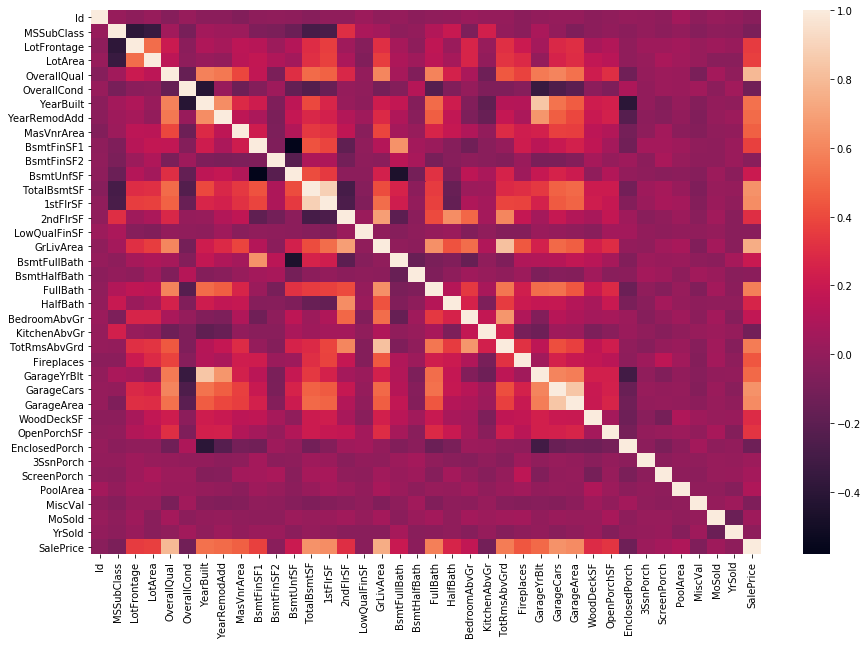

In [2379]:
# plotting Heatmap

plt.figure(figsize=(15,10))
corrmat = df_train.corr()
sns.heatmap(corrmat)
plt.show()

#Corr_matrix = df_train.corr()
#Corr_matrix['SalePrice'].sort_values(ascending=False)

##### Considering variable with high correlation with target variable 'SalePrice'

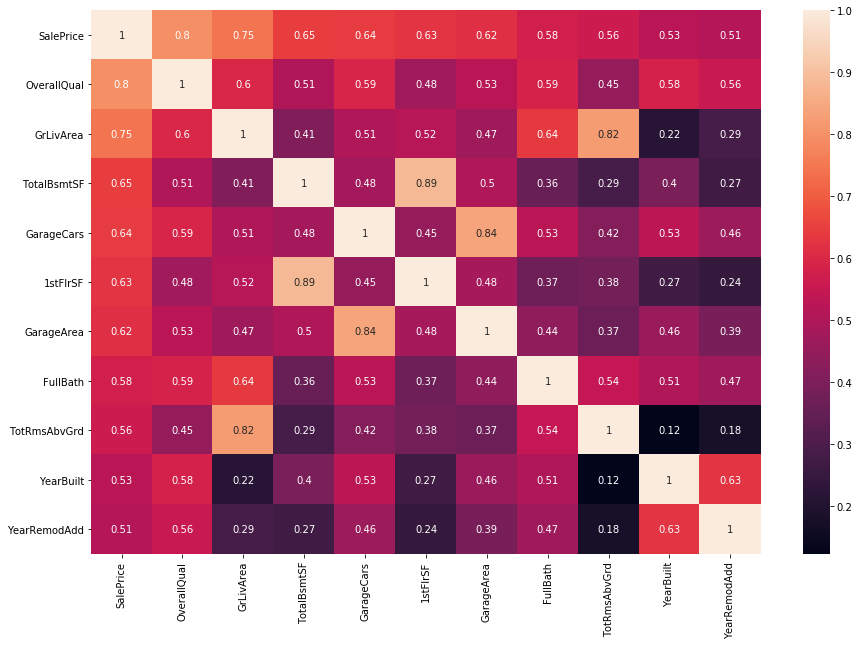

In [2380]:
cols = corrmat.nlargest(11, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(df_train[cols].values.T)
plt.figure(figsize=(15, 10))
sns.heatmap(cm, annot=True, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

In [2381]:
# Plotting pair-plot

#sns.pairplot(df_train[cols])
#plt.show()

### 9. Exploratory Data Analysis

- SalePrice Vs. OverallQual
- SalePrice Vs. GrLivArea
- SalePrice Vs. TotalBsmtSF
- SalePrice Vs. GarageCars
- SalePrice Vs. 1stFlrSF
- SalePrice Vs. GarageArea
- SalePrice Vs. FullBath
- SalePrice Vs. TotRmsAbvGrd
- SalePrice Vs. YearRemodAdd

#### OverallQual Vs. SalePrice 

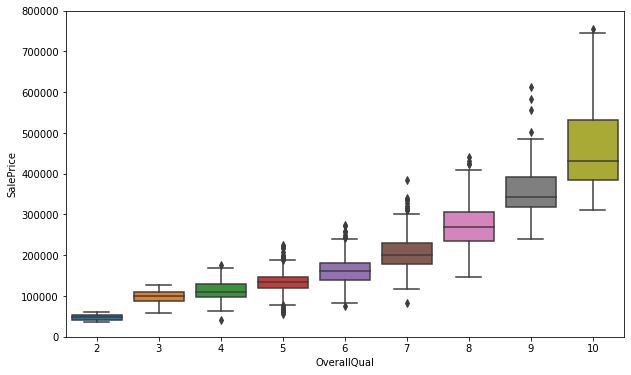

In [2382]:
# OverallQual Vs. SalePrice 

plt.figure(figsize= (10,6))

sns.boxplot(x= df_train['OverallQual'] , y = df_train['SalePrice'], data = df_train)
plt.ylim(0,800000)
plt.show()

#### Inference:
- With higher rating sale prices increases.

#### GrLivArea Vs. SalePrice

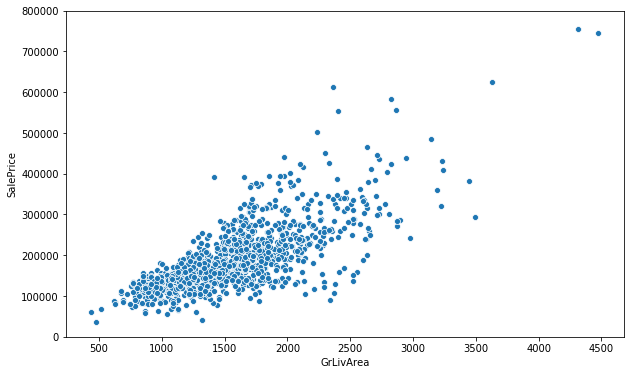

In [2383]:
# GrLivArea Vs. SalePrice

plt.figure(figsize= (10,6))

sns.scatterplot(df_train.GrLivArea, df_train.SalePrice)
plt.ylim(0,800000)
plt.show()

##### Here we have outliers in the data, removing them will be good practice

In [2384]:
df_train['GrLivArea'].quantile([0.8,0.95,0.99,1])

0.80    1866.60
0.95    2445.55
0.99    2876.94
1.00    4476.00
Name: GrLivArea, dtype: float64

In [2385]:
Q99 = df_train['GrLivArea'].quantile(0.99)
df_train = df_train[df_train['GrLivArea'] < Q99]

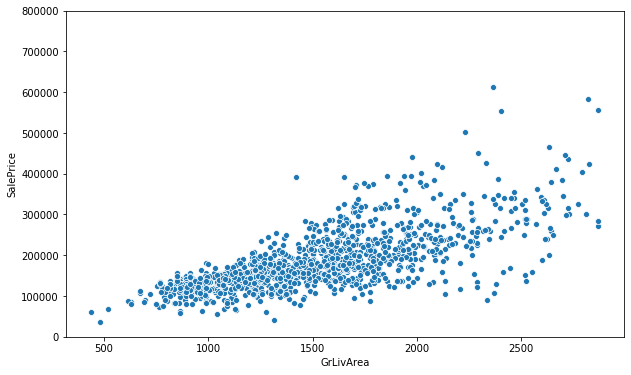

In [2386]:
plt.figure(figsize= (10,6))

sns.scatterplot(df_train.GrLivArea, df_train.SalePrice)

plt.ylim(0,800000)
plt.show()

#### Inference:
- As ground living area increases Sale Price increases.

#### TotalBsmtSF Vs. SalePrice